# Assignment 5

**Team members:**

Praanshu Patel (23110249)

Rishank Soni (23110277)

**Team number: 21**

## Data Augmentation

### Task 1

In [ ]:
# Load the cats and dogs images dataset from the folders 'cats' and 'dogs'

import os

pathcats = 'cats'
pathdogs = 'dogs'

cats = os.listdir(pathcats)
dogs = os.listdir(pathdogs)

print(cats)
print(dogs)

['cat_190.jpg', 'cat_147.jpg', 'cat_542.jpg', 'cat_595.jpg', 'cat_422.jpg', 'cat_583.jpg', 'cat_384.jpg', 'cat_586.jpg', 'cat_545.jpg', 'cat_223.jpg', 'cat_551.jpg', 'cat_587.jpg', 'cat_140.jpg', 'cat_342.jpg', 'cat_430.jpg', 'cat_418.jpg', 'cat_395.jpg', 'cat_156.jpg', 'cat_585.jpg', 'cat_234.jpg', 'cat_355.jpg', 'cat_433.jpg', 'cat_341.jpg', 'cat_332.jpg', 'cat_468.jpg', 'cat_124.jpg', 'cat_118.jpg', 'cat_520.jpg', 'cat_290.jpg', 'cat_119.jpg', 'cat_88.jpg', 'cat_496.jpg', 'cat_523.jpg', 'cat_251.jpg', 'cat_279.jpg', 'cat_244.jpg', 'cat_60.jpg', 'cat_446.jpg', 'cat_268.jpg', 'cat_255.jpg', 'cat_109.jpg', 'cat_525.jpg', 'cat_281.jpg', 'cat_94.jpg', 'cat_313.jpg', 'cat_1.jpg', 'cat_528.jpg', 'cat_306.jpg', 'cat_56.jpg', 'cat_106.jpg', 'cat_113.jpg', 'cat_96.jpg', 'cat_473.jpg', 'cat_116.jpg', 'cat_464.jpg', 'cat_114.jpg', 'cat_538.jpg', 'cat_504.jpg', 'cat_5.jpg', 'cat_358.jpg', 'cat_417.jpg', 'cat_371.jpg', 'cat_575.jpg', 'cat_574.jpg', 'cat_158.jpg', 'cat_564.jpg', 'cat_203.jpg', 'ca

In [2]:
print('Number of cats:', len(cats))
print('Number of dogs:', len(dogs))

Number of cats: 70
Number of dogs: 70


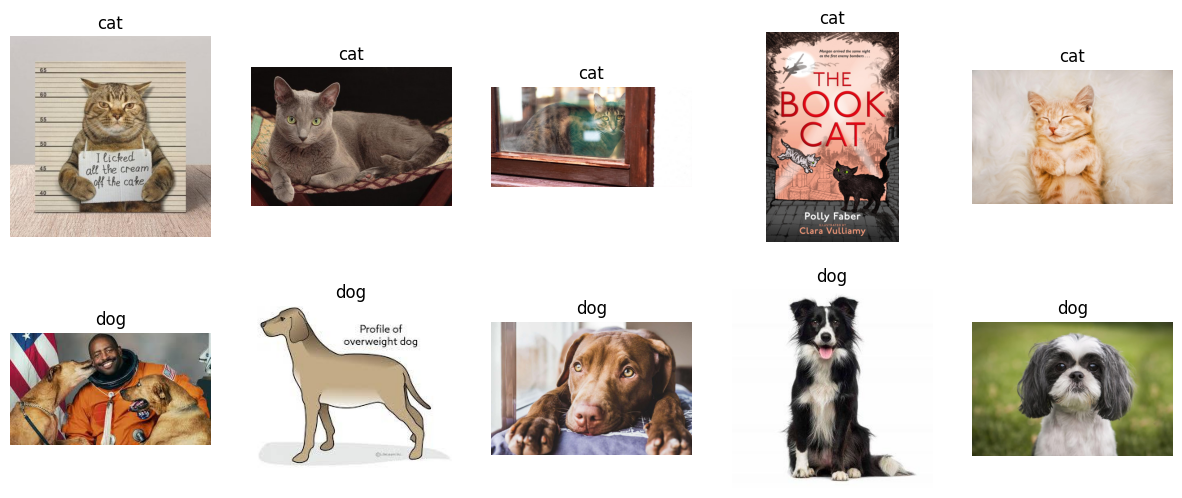

In [3]:
# Display the first 5 images of cats and dogs in 2 rows
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    imgcat = mpimg.imread(pathcats + '/' + cats[i])
    axs[0, i].imshow(imgcat)
    axs[0, i].axis('off')
    axs[0, i].set_title('cat')
    imgdog = mpimg.imread(pathdogs + '/' + dogs[i])
    axs[1, i].imshow(imgdog)
    axs[1, i].axis('off')
    axs[1, i].set_title('dog')


In [4]:
# Perform 80/20 split of each dataset 
from sklearn.model_selection import train_test_split

traincats, testcats = train_test_split(cats, test_size=0.2, random_state=42)
traindogs, testdogs = train_test_split(dogs, test_size=0.2, random_state=42)

In [5]:
%pip install augly


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import augly.image as imaugs
import random
import os

def augment_images(train_images, input_path, output_path):
    # Create a list of augmentation functions from augly.image
    augmentation_ops = [
        imaugs.blur,
        imaugs.crop,
        imaugs.rotate,
        imaugs.scale,
        imaugs.random_noise,
        imaugs.grayscale,
        imaugs.opacity,
        imaugs.brightness,
        imaugs.contrast,
        imaugs.pixelization,
        imaugs.pad_square,
        imaugs.sharpen,
        imaugs.skew,
        imaugs.scale,
    ]

    # Ensure the output directory exists
    # Clear the output directory if it exists, create it if it doesn't
    if os.path.exists(output_path):
        for file in os.listdir(output_path):
            file_path = os.path.join(output_path, file)
            if os.path.isfile(file_path):
                os.remove(file_path)
    os.makedirs(output_path)

    # Iterate over training images
    for k in range(2):
        for filename in train_images:
            input_file = os.path.join(input_path, filename)
            # Randomly select three operations
            ops = random.sample(augmentation_ops, 3)
            augmented_image = input_file
            print(f"Applying {ops} to {filename}")
            i = 0
            for op in ops:
                output_file = os.path.join(output_path, f"{op.__name__}{k}_{filename}")
                augmented_image = op(augmented_image, output_file)
                i += 1
                if i < 3:
                    os.remove(output_file)


In [7]:
# Using the function on traincats
augment_images(traincats, pathcats, 'augmented_cats')

Applying [<function random_noise at 0x176023560>, <function crop at 0x1760227a0>, <function rotate at 0x176023740>] to cat_575.jpg
Applying [<function random_noise at 0x176023560>, <function contrast at 0x176022660>, <function sharpen at 0x176023a60>] to cat_88.jpg
Applying [<function contrast at 0x176022660>, <function scale at 0x176023920>, <function skew at 0x176023ba0>] to cat_5.jpg
Applying [<function blur at 0x176022160>, <function crop at 0x1760227a0>, <function contrast at 0x176022660>] to cat_244.jpg
Applying [<function random_noise at 0x176023560>, <function opacity at 0x176022d40>, <function pad_square at 0x1760232e0>] to cat_504.jpg
Applying [<function scale at 0x176023920>, <function random_noise at 0x176023560>, <function pixelization at 0x1760234c0>] to cat_306.jpg
Applying [<function pixelization at 0x1760234c0>, <function pad_square at 0x1760232e0>, <function opacity at 0x176022d40>] to cat_395.jpg
Applying [<function opacity at 0x176022d40>, <function rotate at 0x1760

In [9]:
augment_images(traindogs, pathdogs, 'augmented_dogs')

Applying [<function brightness at 0x1760222a0>, <function grayscale at 0x176022a20>, <function scale at 0x176023920>] to dog_415.jpg
Applying [<function opacity at 0x176022d40>, <function rotate at 0x176023740>, <function scale at 0x176023920>] to dog_327.jpg
Applying [<function pad_square at 0x1760232e0>, <function random_noise at 0x176023560>, <function skew at 0x176023ba0>] to dog_364.jpg
Applying [<function rotate at 0x176023740>, <function contrast at 0x176022660>, <function blur at 0x176022160>] to dog_442.jpg
Applying [<function rotate at 0x176023740>, <function grayscale at 0x176022a20>, <function opacity at 0x176022d40>] to dog_303.jpg
Applying [<function random_noise at 0x176023560>, <function sharpen at 0x176023a60>, <function rotate at 0x176023740>] to dog_476.jpg
Applying [<function contrast at 0x176022660>, <function pad_square at 0x1760232e0>, <function random_noise at 0x176023560>] to dog_28.jpg
Applying [<function contrast at 0x176022660>, <function scale at 0x17602392

In [8]:
# Checking the size of augmented images
augmented_cats = os.listdir('augmented_cats')
print('Number of augmented cats:', len(augmented_cats))

Number of augmented cats: 112


In [10]:
augmented_dogs = os.listdir('augmented_dogs')
print('Number of augmented dogs:', len(augmented_dogs))

Number of augmented dogs: 112


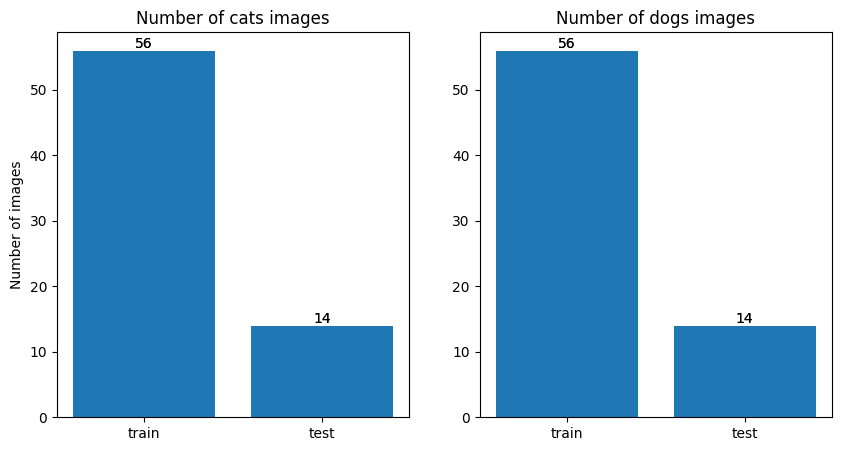

In [11]:
# Plot bar grpahs of the number of images in each dataset
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(['train', 'test'], [len(traincats), len(testcats)])
axs[0].set_title('Number of cats images')
axs[1].bar(['train', 'test'], [len(traindogs), len(testdogs)])
axs[1].set_title('Number of dogs images')
axs[0].set_ylabel('Number of images')
# Display the values on top of the bars
for i in range(2):
    for j in range(2):
        axs[i].text(j, [len(traincats), len(testcats)][j], [len(traincats), len(testcats)][j], ha='center', va='bottom')
        axs[i].text(j, [len(traindogs), len(testdogs)][j], [len(traindogs), len(testdogs)][j], ha='center', va='bottom')
plt.show()

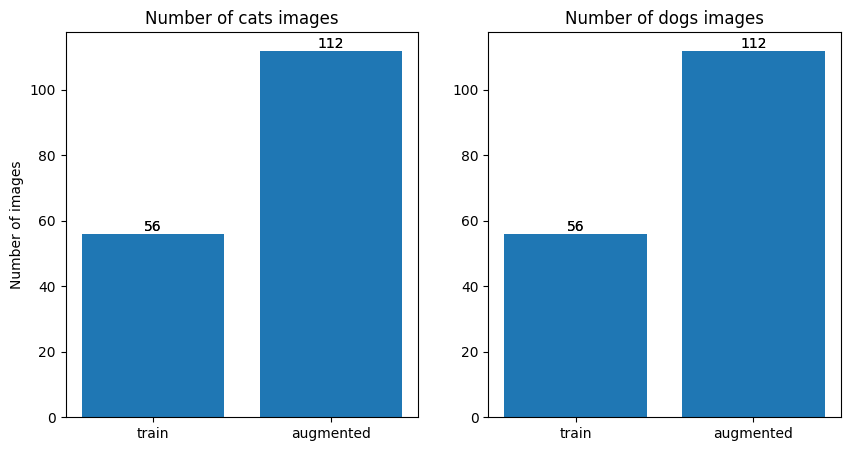

In [12]:
# Bar graph to show Augmented Train Set & Without Augmented Train Set count
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(['train', 'augmented'], [len(traincats), len(augmented_cats)])
axs[0].set_title('Number of cats images')
axs[1].bar(['train', 'augmented'], [len(traindogs), len(augmented_dogs)])
axs[1].set_title('Number of dogs images')
axs[0].set_ylabel('Number of images')
# Display the values on top of the bars
for i in range(2):
    for j in range(2):
        axs[i].text(j, [len(traincats), len(augmented_cats)][j], [len(traincats), len(augmented_cats)][j], ha='center', va='bottom')
        axs[i].text(j, [len(traindogs), len(augmented_dogs)][j], [len(traindogs), len(augmented_dogs)][j], ha='center', va='bottom')
plt.show()

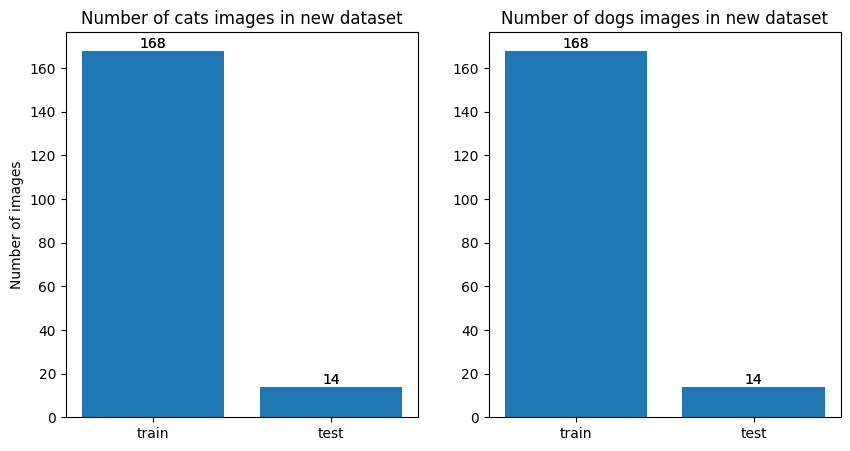

In [ ]:
# Bar graph to show number of cat & dog images in both train set and test set (including augmented).

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(['train', 'test'], [len(traincats) + len(augmented_cats), len(testcats)])
axs[0].set_title('Number of cats images in new dataset')
axs[1].bar(['train', 'test'], [len(traindogs) + len(augmented_dogs), len(testdogs)])
axs[1].set_title('Number of dogs images in new dataset')
axs[0].set_ylabel('Number of images')

# Display the values on top of the bars
for i in range(2):
    for j in range(2):
        axs[i].text(j, [len(traincats) + len(augmented_cats), len(testcats)][j], [len(traincats) + len(augmented_cats), len(testcats)][j], ha='center', va='bottom')
        axs[i].text(j, [len(traindogs) + len(augmented_dogs), len(testdogs)][j], [len(traindogs) + len(augmented_dogs), len(testdogs)][j], ha='center', va='bottom')
plt.show()

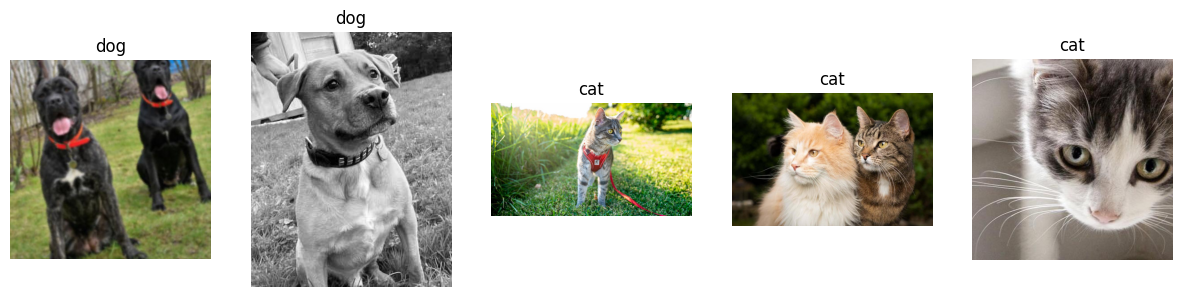

In [14]:
# Load the training and test images
import random

# Append the images and labels for cats and dogs from the original dataset
train_images_orig = []
train_labels_orig = []
for filename in traincats:
    train_images_orig.append(os.path.join(pathcats, filename))
    train_labels_orig.append(0)
for filename in traindogs:
    train_images_orig.append(os.path.join(pathdogs, filename))
    train_labels_orig.append(1)

# Append the images and labels for cats and dogs from the test dataset
test_images = []
test_labels = []
for filename in testcats:
    test_images.append(os.path.join(pathcats, filename))
    test_labels.append(0)
for filename in testdogs:
    test_images.append(os.path.join(pathdogs, filename))
    test_labels.append(1)

# Load the augmented images into a copy train_images and train_labels
train_images_new = list(train_images_orig)
train_labels_new = list(train_labels_orig)

# Append the augmented images and labels for cats and dogs
for filename in augmented_cats:
    train_images_new.append(os.path.join('augmented_cats', filename))
    train_labels_new.append(0)
for filename in augmented_dogs:
    train_images_new.append(os.path.join('augmented_dogs', filename))
    train_labels_new.append(1)

# Display a few random images and their labels
fig, axs = plt.subplots(1, 5, figsize=(15, 6))

for i in range(5):
    n = random.randint(0, len(train_images_new) - 1)
    img = mpimg.imread(train_images_new[n])
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title('cat' if train_labels_new[n] == 0 else 'dog')

## Model Training

## Task 2

(Initial weights of the model are the same when training with both datasets)

**Training on the microsoft/resnet-50 model from hugging face**

Model Architecture Diagram:

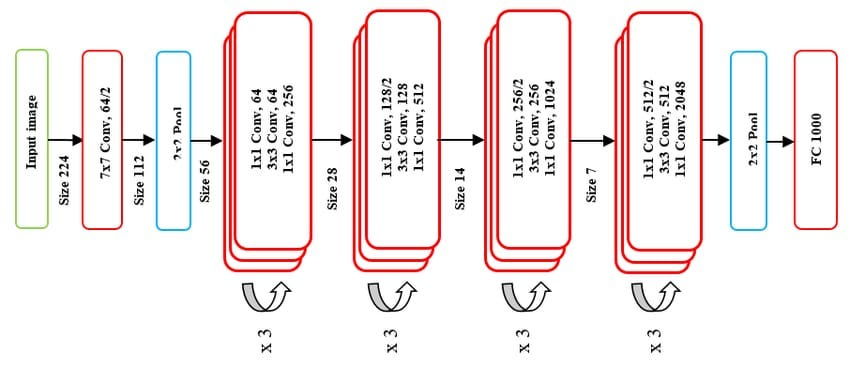

The architecture consists of:

- **Input Layer**: Accepts an image of size 224×224×3.

- **Initial Convolution and Pooling**:
    - A 7×7 convolution layer with 64 filters and stride 2.
    - Followed by batch normalization, ReLU activation, and a max pooling layer (3×3, stride 2), reducing the size to 56×56.

- **Residual Blocks**: Organized into four stages, each containing a series of residual blocks:
    - **Stage 1**: 3 residual blocks with [1×1, 3×3, 1×1] convolutions and output dimensions of 64, 64, and 256 channels, respectively.
    - **Stage 2**: 4 residual blocks, increasing dimensions to 128, 128, and 512.
    - **Stage 3**: 6 residual blocks, with dimensions 256, 256, and 1024.
    - **Stage 4**: 3 residual blocks, with dimensions 512, 512, and 2048. Each block uses a skip connection to facilitate gradient flow.

- **Global Average Pooling**: A 2×2 pooling layer reducing the spatial dimensions to 1×1.

- **Fully Connected Layer**: Outputs 1,000 classes for classification.

In [15]:
from transformers import ResNetForImageClassification, ResNetConfig, ResNetModel
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Use GPU if available

def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight.to(device)) # Initialize the weights with Xavier uniform
        m.bias.data.fill_(0.01) # Initialize the bias with 0.01

config = ResNetConfig.from_pretrained("microsoft/resnet-50") # Load the configuration of the ResNet model
config.num_labels = len(set(train_labels_new)) # Set the number of labels to the number of classes

model = ResNetForImageClassification(config) # Load the ResNet model
model.apply(init_weights) # Initialize the weights of the model

# Save the weights of the model
torch.save(model.state_dict(), 'resnet_weights.pth')
     
# Print the model architecture
print(model)

# Print the weights of the model
print(model.state_dict())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/8m/kv3_bcpj5f57y7d020d51yjm0000gn/T/ipykernel_27314/2621973878.py:9: FutureWarning: `nn.init.xavier_uniform` is now deprecated in favor of `nn.init.xavier_uniform_`.
  torch.nn.init.xavier_uniform(m.weight.to(device)) # Initialize the weights with Xavier uniform


ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [16]:
# Image preprocessing

# Convert images to 224x224 pixels, normalize pixel values, and convert to PyTorch tensor

from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader, TensorDataset

preprocess = transforms.Compose([
    transforms.Resize((224,224)), # Resize the image to 224x224 pixels for ResNet
    transforms.ToTensor(), # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize pixel values
])

In [17]:
# Preprocess the images (resize, normalize, convert to tensor)
def preprocess_image(img_path, preprocess):
    img = mpimg.imread(img_path)
    img = Image.fromarray(img)  # Convert NumPy array to PIL image
    img_tensor = preprocess(img)
    return img_tensor

# Convert the images to PyTorch tensors
def convert_images_to_tensor(image_paths, preprocess):
    tensor_list = []
    for img_path in image_paths:
        img_tensor = preprocess_image(img_path, preprocess)
        tensor_list.append(img_tensor)
    return torch.stack(tensor_list)

# Convert the labels to PyTorch tensor
def convert_labels_to_tensor(labels):
    return torch.tensor(labels)

# Create a PyTorch DataLoader to load the data in batches
def create_dataloader(image_tensors, labels_tensor, batch_size, shuffle):
    dataset = TensorDataset(image_tensors, labels_tensor)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# Process the datasets and create DataLoaders for training and testing
def process_dataset(train_images, test_images, train_labels, test_labels, preprocess, batch_size=8):
    train_tensor = convert_images_to_tensor(train_images, preprocess)
    test_tensor = convert_images_to_tensor(test_images, preprocess)
    
    train_labels_tensor = convert_labels_to_tensor(train_labels)
    test_labels_tensor = convert_labels_to_tensor(test_labels)
    
    train_loader = create_dataloader(train_tensor, train_labels_tensor, batch_size, shuffle=True)
    test_loader = create_dataloader(test_tensor, test_labels_tensor, batch_size, shuffle=False)
    
    # Print the shapes of the tensors for confirmation
    print('Train tensor shape:', train_tensor.shape)
    print('Train labels tensor shape:', train_labels_tensor.shape)
    print('Test tensor shape:', test_tensor.shape)
    print('Test labels tensor shape:', test_labels_tensor.shape)
    
    return train_loader, test_loader

In [18]:
print('Original dataset:')
train_loader_orig, test_loader_orig = process_dataset(train_images_orig, test_images, train_labels_orig, test_labels, preprocess)
print('\nNew dataset:')
train_loader_new, test_loader_new = process_dataset(train_images_new, test_images, train_labels_new, test_labels, preprocess)

Original dataset:


Train tensor shape: torch.Size([112, 3, 224, 224])
Train labels tensor shape: torch.Size([112])
Test tensor shape: torch.Size([28, 3, 224, 224])
Test labels tensor shape: torch.Size([28])

New dataset:
Train tensor shape: torch.Size([336, 3, 224, 224])
Train labels tensor shape: torch.Size([336])
Test tensor shape: torch.Size([28, 3, 224, 224])
Test labels tensor shape: torch.Size([28])


**Training on the original dataset**

In [ ]:
# Training the model using the original dataset 
# using the Adam optimizer and the CrossEntropyLoss loss function to train the model

import torch.optim as optim
import torch.nn as nn

def train_model(model, train_loader, epochs=5, lr=0.001):
    criterion = nn.CrossEntropyLoss() 
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0): # Iterate over the data
            inputs, labels = data 
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad() # Zero the parameter gradients to avoid accumulation
            outputs = model(inputs) # Forward pass
            loss = criterion(outputs.logits, labels) # Compute the loss
            loss.backward() # Backward pass
            optimizer.step() # Optimize the model
            running_loss += loss.item() # Add the loss
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")
    print('Finished Training')

In [20]:
# Train the model using the original dataset
train_model(model, train_loader_orig, epochs=10, lr=0.001)

Epoch 1, Loss: 3.8999603177819933
Epoch 2, Loss: 1.1947546814169203
Epoch 3, Loss: 0.8793358547346932
Epoch 4, Loss: 0.73918445621218
Epoch 5, Loss: 0.6588661266224725
Epoch 6, Loss: 0.6600124942404884
Epoch 7, Loss: 0.6082376433270318
Epoch 8, Loss: 0.6666870979326112
Epoch 9, Loss: 0.577766515314579
Epoch 10, Loss: 0.4237429659281458
Finished Training


In [21]:
# Display confusion matrix and metrics for the original dataset
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(model, test_loader):
    # Evaluate the model
    model.eval()
    predictions = []
    actuals = []

    # Disable gradient calculation
    with torch.no_grad():
        for data in test_loader:
            images, labels = data # Get the inputs; data is a list of [inputs, labels]
            images, labels = images.to(device), labels.to(device) # Move the input and model to GPU for speed if available
            outputs = model(images) # Forward pass (returns logits)
            _, predicted = torch.max(outputs.logits, 1) # Get the predicted class index (_ is the max value of the logits)
            predictions.extend(predicted.cpu().numpy()) # Append the predictions to a list
            actuals.extend(labels.cpu().numpy()) # Append the actuals to a list

    # Confusion matrix
    cm = confusion_matrix(actuals, predictions)

    # Accuracy, Precision, Recall and F1 score
    accuracy = accuracy_score(actuals, predictions)
    precision = precision_score(actuals, predictions)
    recall = recall_score(actuals, predictions)
    f1 = f1_score(actuals, predictions)
    
    # Display metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Display confusion matrix using seaborn heatmap
    plt.figure(figsize=(10, 7))
    # Map 0 to 'cat' and 1 to 'dog'
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'], cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    return


Original dataset:
Accuracy: 0.4642857142857143
Precision: 0.47368421052631576
Recall: 0.6428571428571429
F1 Score: 0.5454545454545454


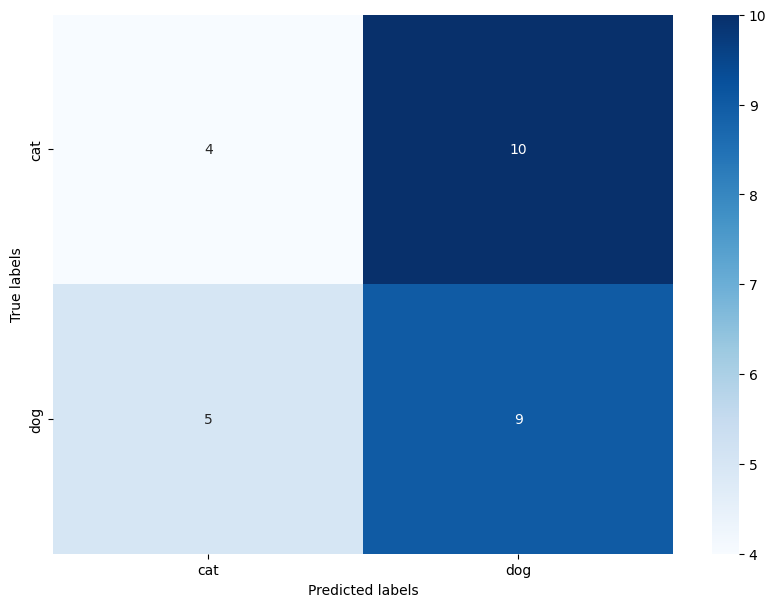

In [22]:
# Evaluate the model using the original test set
print('Original dataset:')
evaluate_model(model, test_loader_orig)

**Training on new dataset**

In [23]:
# Initialize a new ResNet model and load the saved weights
resnet_new = ResNetForImageClassification(config) # Load the ResNet model
resnet_new.load_state_dict(torch.load('resnet_weights.pth')) # Load the saved weights
resnet_new.to(device) # Move the model to the device

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [24]:
# Train the model using the new dataset
train_model(resnet_new, train_loader_new, epochs=10, lr=0.001)

Epoch 1, Loss: 2.1487116473061696
Epoch 2, Loss: 0.9305586055630729
Epoch 3, Loss: 0.7287338141884122
Epoch 4, Loss: 0.6982525218100775
Epoch 5, Loss: 0.7734045216015407
Epoch 6, Loss: 0.6898202353290149
Epoch 7, Loss: 0.6040101980879193
Epoch 8, Loss: 0.7126628182651031
Epoch 9, Loss: 0.6613433871950422
Epoch 10, Loss: 0.614619968192918
Finished Training


New dataset:
Accuracy: 0.6071428571428571
Precision: 0.5789473684210527
Recall: 0.7857142857142857
F1 Score: 0.6666666666666666


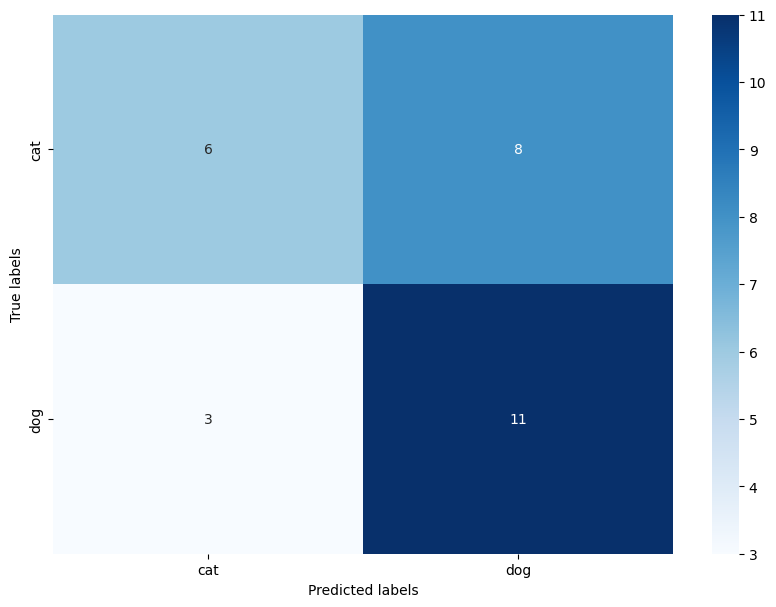

In [25]:
# Evaluate the model using the new test set
print('New dataset:')
evaluate_model(resnet_new, test_loader_new)


# Final Report

## Code Documentation
- We have implemented a **cat vs dog image classifier** using **ResNet-50**.
- **Data augmentation** was performed using `augly` library with **14 different operations**.
  - `blur`,
  - `crop`,
  - `rotate`,
  - `scale`,
  - `random_noise`,
  - `grayscale`,
  - `opacity`,
  - `brightness`,
  - `contrast`,
  - `pixelization`,
  - `pad_square`,
  - `sharpen`,
  - `skew`,
  - `scale`,
- **Evaluation metrics** were computed using `scikit-learn`'s metrics module.

## Data Overview
- **Original dataset**: 140 images (**70 cats, 70 dogs**).
- **Train/test split**: **80/20**.
- **Original dataset sizes after splitting**:
  - **Training**: **56 images per class**.
  - **Test**: **14 images per class**.
- **Augmented training set**: **3× increase in training data**.
- **Final dataset sizes**:
  - **Training**: **168 images per class** (including augmented data).
  - **Test**: **14 images per class**.

## Parameters:
- **Learning Rate**: 0.001
- **Optimizer**: Adam
- **Number of epochs**: 10
- **Loss Function**: Binary cross entropy loss

## Model Performance Analysis

### Metrics Comparison
|Metric|Original Dataset|Augmented Dataset|Improvement|
|------|---------------|-----------------|-----------|
|**Accuracy**|46.4%|60.7%|+14.3%|
|**Precision**|47.4%|57.9%|+10.5%|
|**Recall**|64.3%|78.6%|+14.3%|
|**F1 Score**|54.5%|66.7%|+12.2%|

### Key Observations
1. **Model shows moderate improvement** with **augmented data**.
2. **Highest improvement** is observed in **recall (+14.3%)**, indicating better ability to identify both classes correctly.
3. **Precision increased by 10.5%**, meaning fewer false positives.
4. **Overall accuracy increased by 14.3%**, demonstrating better classification capability.
5. **F1 score improved by 12.2%**, suggesting a balanced enhancement in both precision and recall.

### Explanation of Results
- The **overall accuracy** of **both models** is **relatively low** because we have a **very small dataset**.
- The **augmentation process** introduced **more diverse samples**, improving **generalization**.
- The **baseline model** struggled due to a **small dataset**, leading to **overfitting**.
- After augmentation, the **increase in recall** suggests that the model is **learning better representations**.
- Overall, the augmentation **positively impacted performance** by reducing **bias** and **variance**.
```

